# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
!pip install splinter==0.18
!pip install selenium==3.141.0
!pip install webdriver-manager

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser
 
executable_path = {'executable_path': ChromeDriverManager().install()}
executable_path
browser         = Browser(driver_name='chrome',
                          retry_count=1,
                          **executable_path,
                          headless=False)
browser

In [3]:
# Import relevant libraries
import pandas as pd
#from splinter import Browser
from bs4 import BeautifulSoup
#from selenium.webdriver.chrome.service import Service
#mys = Service(executable_path="chromedriver.exe")
#browser = Browser('chrome', service=mys)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
# CITATION: Instructor help
table = soup.find("table", class_="table")
rows = table.find_all("tr", class_="data-row")
print (rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
# CITATION: Instructor help
data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all("td")
    row_for_df = []
    for c in cells:
        row_for_df.append(c.text)
    data.append(row_for_df)
#data

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Confirm DataFrame was created successfully

# rename the columns??

# ...
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all("td")
    row_for_df = []
    for c in cells:
        row_for_df.append(c.text)
    data.append(row_for_df)

# Define the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create a Pandas DataFrame by using the list of rows and the column names
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column

print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' to int
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again

print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?

unique_months = df['month'].nunique()
print("Number of unique months on Mars:", unique_months)

Number of unique months on Mars: 12


In [14]:
# 2. How many Martian days' worth of data are there?

martian_days_range = df['sol'].max() - df['sol'].min() + 1
print("Number of Martian days' worth of data:", martian_days_range)

Number of Martian days' worth of data: 1968


In [15]:
# 3. What is the average low temperature by month?

# Group the data by month and calculate the mean of min_temp for each month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean().reset_index()

# Rename the columns for clarity
average_low_temp_by_month.columns = ['Month', 'Average Low Temperature (°C)']

# Display the result
print(average_low_temp_by_month)

    Month  Average Low Temperature (°C)
0       1                    -77.160920
1       2                    -79.932584
2       3                    -83.307292
3       4                    -82.747423
4       5                    -79.308725
5       6                    -75.299320
6       7                    -72.281690
7       8                    -68.382979
8       9                    -69.171642
9      10                    -71.982143
10     11                    -71.985507
11     12                    -74.451807


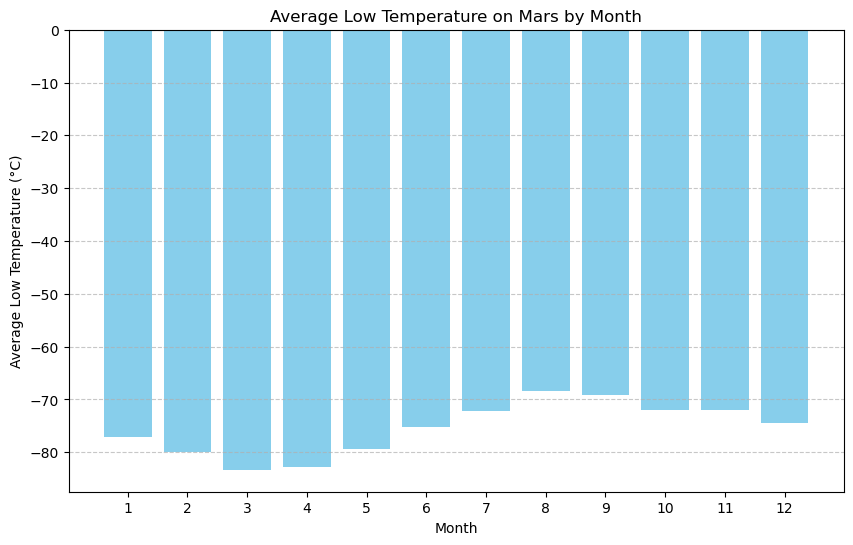

In [16]:
# Plot the average temperature by month

import matplotlib.pyplot as plt

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_low_temp_by_month['Month'], average_low_temp_by_month['Average Low Temperature (°C)'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.title('Average Low Temperature on Mars by Month')
plt.xticks(average_low_temp_by_month['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

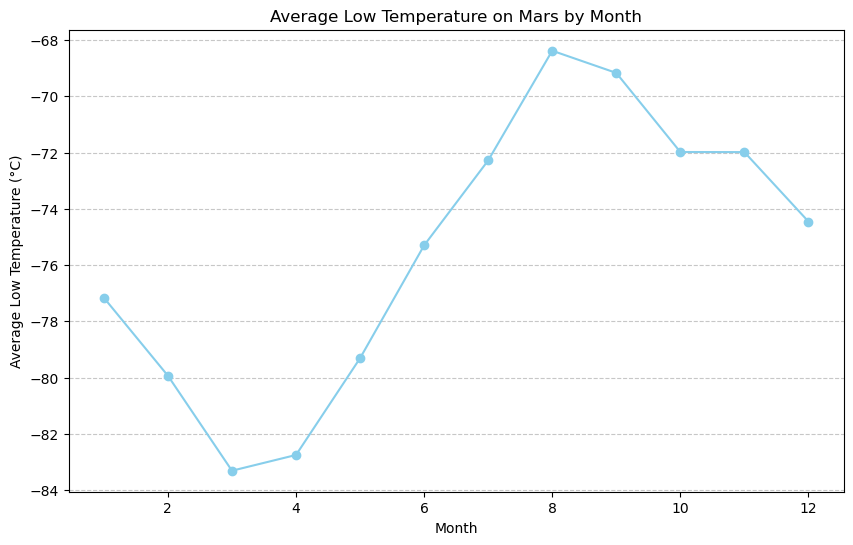

In [17]:

# Plot the average temperature by month as a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_low_temp_by_month['Month'], average_low_temp_by_month['Average Low Temperature (°C)'], marker='o', color='skyblue', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.title('Average Low Temperature on Mars by Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()








In [18]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the DataFrame by average low temperature in ascending order to find the coldest month
coldest_month = average_low_temp_by_month.sort_values(by='Average Low Temperature (°C)').iloc[0]

# Sort the DataFrame by average low temperature in descending order to find the hottest month
hottest_month = average_low_temp_by_month.sort_values(by='Average Low Temperature (°C)', ascending=False).iloc[0]

print(f"The coldest month is {coldest_month['Month']} with an average low temperature of {coldest_month['Average Low Temperature (°C)']}°C.")
print(f"The hottest month is {hottest_month['Month']} with an average low temperature of {hottest_month['Average Low Temperature (°C)']}°C.")

The coldest month is 3.0 with an average low temperature of -83.30729166666667°C.
The hottest month is 8.0 with an average low temperature of -68.38297872340425°C.


In [19]:
# 4. Average pressure by Martian month

# Group the data by the "month" column and calculate the mean of the "pressure" column for each group
average_pressure_by_month = df.groupby("month")["pressure"].mean()

# Display the resulting Series
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

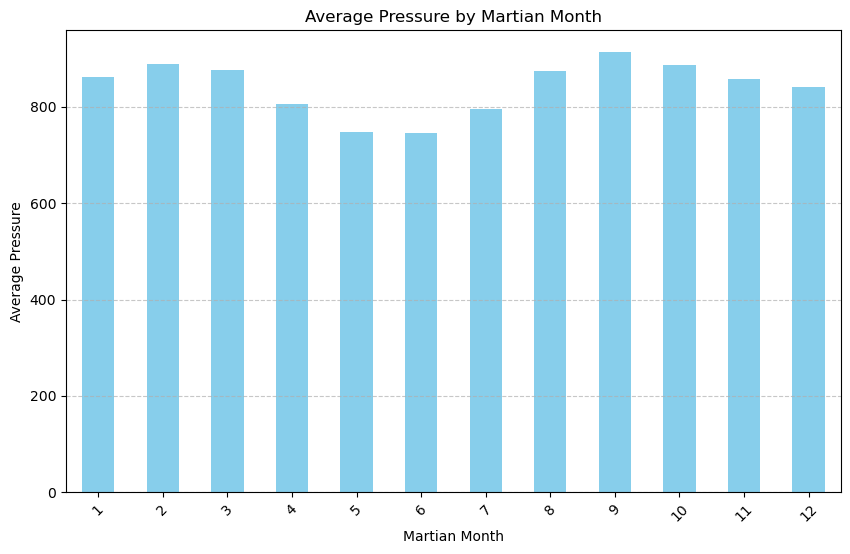

In [20]:
# Plot the average pressure by month

# Group the data by the "month" column and calculate the mean of the "pressure" column for each group
average_pressure_by_month = df.groupby("month")["pressure"].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind="bar", color="skyblue")
plt.title("Average Pressure by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()







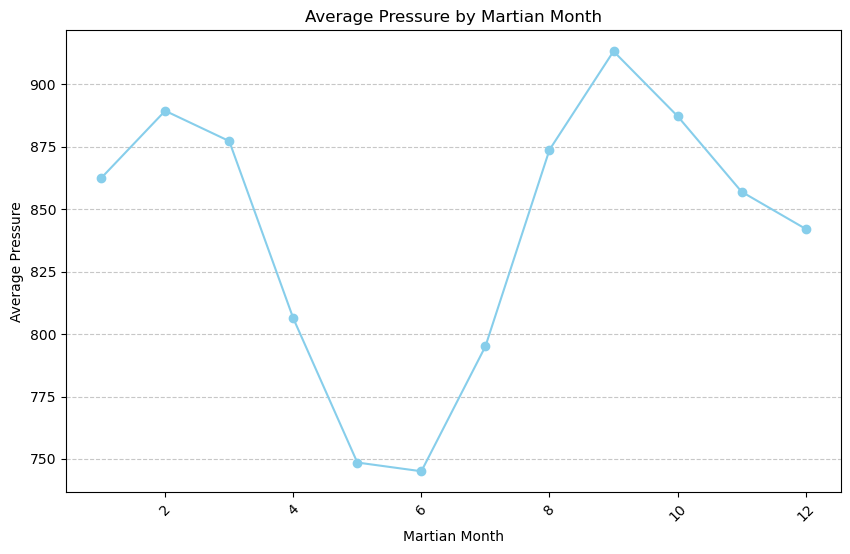

In [21]:
# Group the data by the "month" column and calculate the mean of the "pressure" column for each group
average_pressure_by_month = df.groupby("month")["pressure"].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind="line", marker='o', color="skyblue", linestyle='-')
plt.title("Average Pressure by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Pressure")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

martian_year_earth_days = 687

print(f"There are {martian_year_earth_days} Earth days in a Martian year.")

There are 687 Earth days in a Martian year.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [24]:
browser.quit()